<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Average-Star-Ratings" data-toc-modified-id="Average-Star-Ratings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Average Star Ratings</a></span></li><li><span><a href="#Review-Length-and-Star-Ratings" data-toc-modified-id="Review-Length-and-Star-Ratings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Review Length and Star Ratings</a></span></li><li><span><a href="#Cities-in-the-Dataset" data-toc-modified-id="Cities-in-the-Dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cities in the Dataset</a></span></li><li><span><a href="#Looking-at-Restaurant-Categories" data-toc-modified-id="Looking-at-Restaurant-Categories-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Looking at Restaurant Categories</a></span></li><li><span><a href="#Individual-Restaurant-Analysis" data-toc-modified-id="Individual-Restaurant-Analysis-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Individual Restaurant Analysis</a></span><ul class="toc-item"><li><span><a href="#Looking-at-Checkins" data-toc-modified-id="Looking-at-Checkins-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Looking at Checkins</a></span></li><li><span><a href="#Timeseries" data-toc-modified-id="Timeseries-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Timeseries</a></span></li></ul></li><li><span><a href="#Users-and-their-friends" data-toc-modified-id="Users-and-their-friends-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Users and their friends</a></span></li></ul></li><li><span><a href="#NLP---Restaurant-Reviews" data-toc-modified-id="NLP---Restaurant-Reviews-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>NLP - Restaurant Reviews</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#NLP---Using-NLTK" data-toc-modified-id="NLP---Using-NLTK-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>NLP - Using NLTK</a></span><ul class="toc-item"><li><span><a href="#Tokenize-words" data-toc-modified-id="Tokenize-words-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>Tokenize words</a></span></li><li><span><a href="#Lowercase" data-toc-modified-id="Lowercase-2.0.1.2"><span class="toc-item-num">2.0.1.2&nbsp;&nbsp;</span>Lowercase</a></span></li><li><span><a href="#Removing-stop-words-and-using-alphabetical-characters-only" data-toc-modified-id="Removing-stop-words-and-using-alphabetical-characters-only-2.0.1.3"><span class="toc-item-num">2.0.1.3&nbsp;&nbsp;</span>Removing stop words and using alphabetical characters only</a></span></li></ul></li><li><span><a href="#Gensim-library" data-toc-modified-id="Gensim-library-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Gensim library</a></span><ul class="toc-item"><li><span><a href="#Gensim-TF-IDF" data-toc-modified-id="Gensim-TF-IDF-2.0.2.1"><span class="toc-item-num">2.0.2.1&nbsp;&nbsp;</span>Gensim TF-IDF</a></span></li><li><span><a href="#Gensim-Bigrams-and-Trigrams" data-toc-modified-id="Gensim-Bigrams-and-Trigrams-2.0.2.2"><span class="toc-item-num">2.0.2.2&nbsp;&nbsp;</span>Gensim Bigrams and Trigrams</a></span></li><li><span><a href="#LDA-Topics" data-toc-modified-id="LDA-Topics-2.0.2.3"><span class="toc-item-num">2.0.2.3&nbsp;&nbsp;</span>LDA Topics</a></span></li></ul></li><li><span><a href="#Sentiment-Analysis-using-Afinn" data-toc-modified-id="Sentiment-Analysis-using-Afinn-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Sentiment Analysis using Afinn</a></span></li><li><span><a href="#Sentiment-Analysis-using-TextBlob" data-toc-modified-id="Sentiment-Analysis-using-TextBlob-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Sentiment Analysis using TextBlob</a></span></li></ul></li></ul></li></ul></div>

# EDA

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style='whitegrid')
import matplotlib.pyplot as plt
import statsmodels

In [2]:
#sets the default options for viewing pandas dataframes
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
#pd.set_option('display.width', 100)
pd.set_option('display.max_info_columns', 50)

In [3]:
path = '/Users/dmitriykats/Documents/SpringBoard/Springboard/Capstone2/true_review/data/'

In [4]:
df = pd.read_csv(f'{path}/raw/restaurant_reviews.csv', parse_dates=['date'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.columns

Index(['user_id', 'business_id', 'rev_stars', 'date', 'text', 'useful',
       'funny', 'cool', 'bus_id', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'bus_stars',
       'review_count', 'is_open', 'categories'],
      dtype='object')

In [6]:
df = df.drop(columns='bus_id')

In [7]:
#create a weekday column 
df['weekday'] = df.date.apply(lambda x: x.weekday())
#add a new colomn which calculates the number of characters in a given review
df['text length'] = df['text'].apply(len)
#add a year column
df['year'] = df.date.apply(lambda x: x.year)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066833 entries, 0 to 3066832
Data columns (total 23 columns):
user_id         object
business_id     object
rev_stars       int64
date            datetime64[ns]
text            object
useful          int64
funny           int64
cool            int64
name            object
neighborhood    object
address         object
city            object
state           object
postal_code     object
latitude        float64
longitude       float64
bus_stars       float64
review_count    int64
is_open         int64
categories      object
weekday         int64
text length     int64
year            int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(10)
memory usage: 538.2+ MB


In [9]:
df.isnull().sum()

user_id               0
business_id           0
rev_stars             0
date                  0
text                  0
useful                0
funny                 0
cool                  0
name                  0
neighborhood    1461574
address               0
city                  0
state                 0
postal_code        1054
latitude              0
longitude             0
bus_stars             0
review_count          0
is_open               0
categories            0
weekday               0
text length           0
year                  0
dtype: int64

In [97]:
df.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
0,DUfWxxewcJgGcc1Y189XSQ,ZcAoKSDT6BNcWsn3o4-WVA,2,2017-01-07,Cool place packed to the rafters. Menu is pret...,1,0,0,"""Me & Julio""",NaN,"""2784 S Fish Hatchery Rd""",Fitchburg,WI,53711,43.005728,-89.427154,3.0,102,1,Restaurants;Mexican;Tex-Mex;American (Traditio...,5,369,2017
1,oAJf-_URH4QBMs2ZMpjUyA,9VhZRkmyoEho58vmnMh_Hg,3,2016-04-11,"I've had mixed experiences at this Montana's, ...",0,0,0,"""Montana's BBQ & Bar""",NaN,"""8735 Yonge St""",Richmond Hill,ON,L4C 6Z1,43.840823,-79.428224,3.0,49,1,Comfort Food;Restaurants;American (Traditional...,0,524,2016
2,SOb8RgcqBGbwlq9LZXy3fQ,IgOaTag1zhIXndxngP0M3w,1,2016-09-21,Die Angaben hier sind leider nicht mehr ganz k...,0,0,0,"""Restaurant Ganesha""",NaN,"""Auberlenstr. 40""",Fellbach,BW,70736,48.818648,9.270925,3.0,8,1,Restaurants;Indian,2,125,2016
3,Iwe-xN6dnugdZ0KiQjO6Hg,Fvd8qeJCXFbMYQk45S7iBQ,5,2014-06-30,My family came in while waiting for our time a...,0,0,0,"""Las Fuentes Mexican Grill""",NaN,"""13621 N Litchfield Rd""",Surprise,AZ,85374,33.607472,-112.355941,3.5,151,1,Mexican;Restaurants,0,256,2014
4,VSCpdfEtjdWjTbBVKMb5eA,mF2EW3twSrFPmT_RVV1-Qg,2,2011-11-18,I would not recommend this place for Chinese f...,3,5,0,"""House of Hunan""",NaN,"""18 Public Sq""",Medina,OH,44256,41.138544,-81.864299,3.0,83,1,Restaurants;Chinese,4,992,2011


## Average Star Ratings

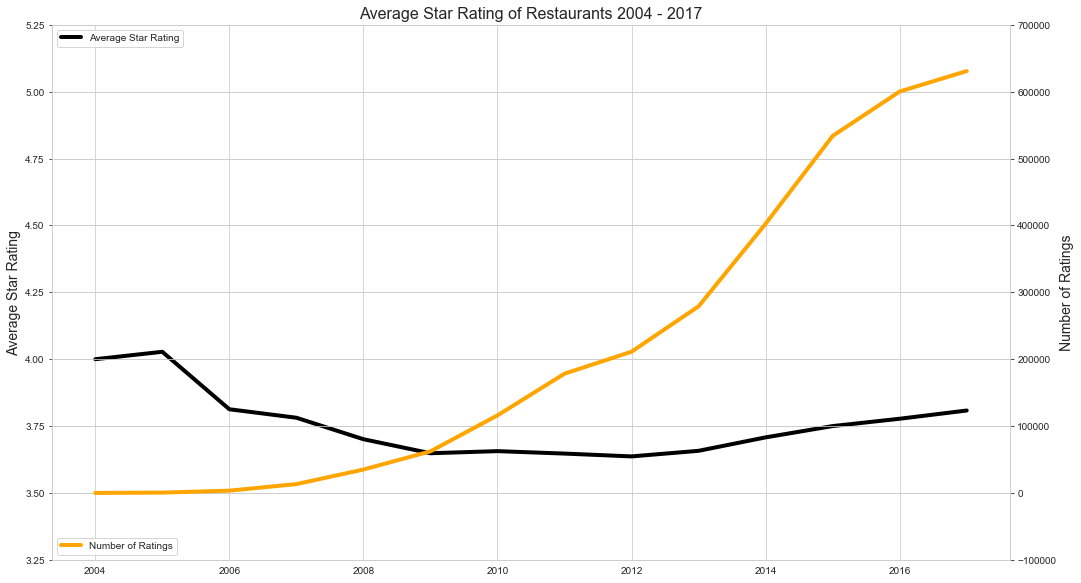

In [10]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

# puts the data in the figure
x1 = df.groupby(['year'])['rev_stars'].mean().keys()
x2 =  df.groupby(['year'])['rev_stars'].count().keys()

y1 = df.groupby(['year'])['rev_stars'].mean().values
y2 = df.groupby(['year'])['rev_stars'].count().values

ax = plt.subplot(111)
ax.plot(x1, y1, color='black', linewidth=4)
plt.legend(['Average Star Rating'], loc='upper left')
plt.ylim(3.25, 5.25)
plt.ylabel('Average Star Rating', fontsize=14)

ax2 = ax.twinx()
ax2.plot(x2, y2, color='orange', linewidth=4)
plt.legend(['Number of Ratings'], loc='lower left')
plt.ylim(-100000, 700_000)
plt.ylabel('Number of Ratings', fontsize=14)

plt.title('Average Star Rating of Restaurants 2004 - 2017', fontsize=16)
plt.show()

In [11]:
ave_reviews = pd.DataFrame(df.groupby(['year','business_id'])['rev_stars'].mean()).reset_index()

In [12]:
ave_reviews.head()

,year,business_id,rev_stars
0,2004,9X-43jnj6-6ZBuBdFm7BLA,2.0
1,2004,AtLv64FV-Pw6JuT3XUKU1g,4.0
2,2004,N2PlDjUJVfOJzsPzY0Au1w,3.0
3,2004,PD2MAlYYi9HCqPH7IBKwTg,5.0
4,2004,oYMsq2Xvzw6UbrIlMWjb-A,4.0


Text(0.5, 52.0, 'Year')

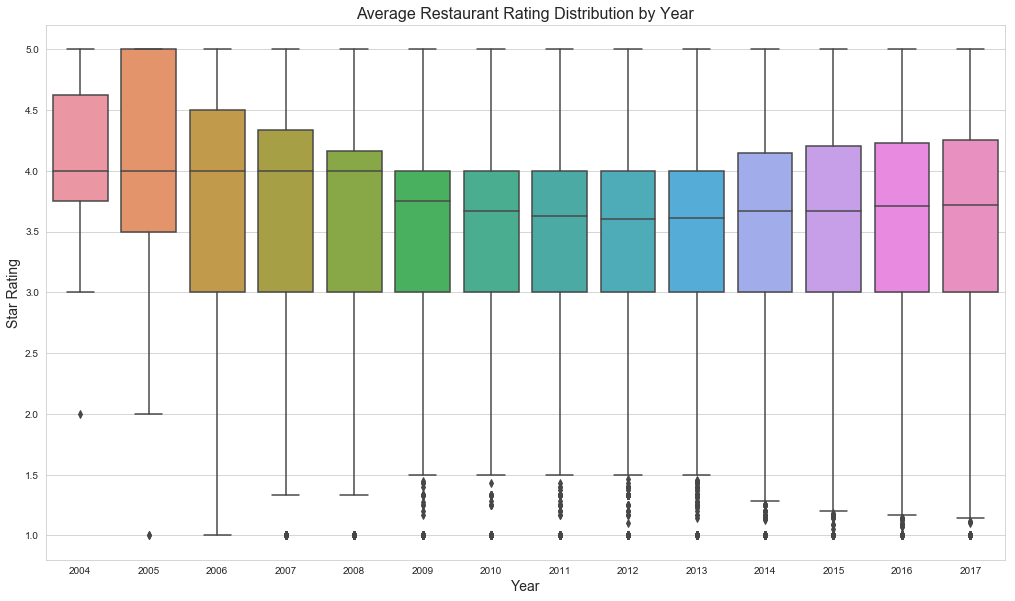

In [13]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.boxplot(x='year', y='rev_stars', data=ave_reviews)
plt.title('Average Restaurant Rating Distribution by Year', fontsize=16)
plt.ylabel('Star Rating', fontsize=14)
plt.xlabel('Year', fontsize=14)

## Review Length and Star Ratings

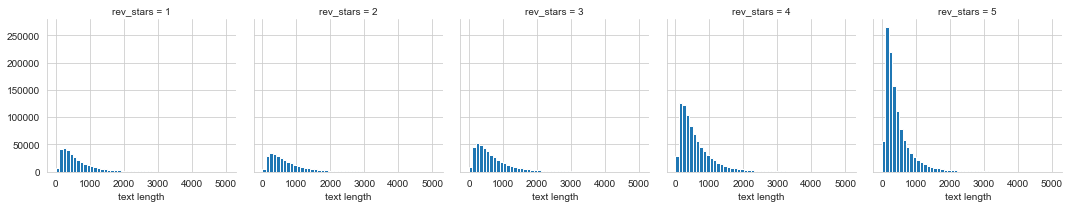

In [14]:
#distribution of reviews for each star rating
g = sns.FacetGrid(data=df, col='rev_stars')
g.map(plt.hist, 'text length', bins=50)

Text(0.5, 52.0, 'Star Rating')

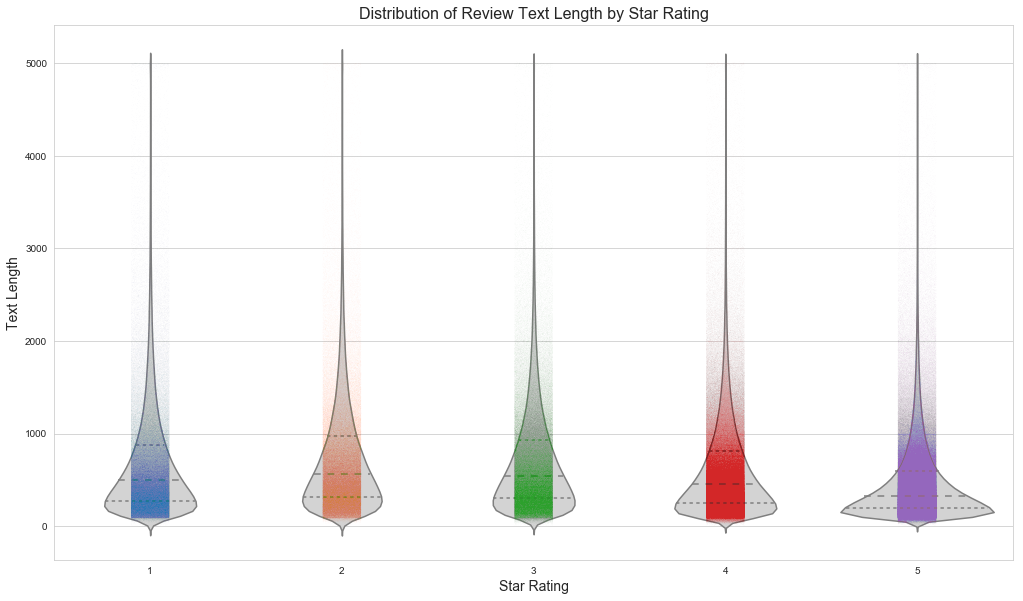

In [15]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.stripplot(x='rev_stars', y='text length', data=df, jitter=1, size=0.2, alpha=0.2)
sns.violinplot(x='rev_stars', y='text length', data=df, inner='quartile', color='lightgray')
plt.title('Distribution of Review Text Length by Star Rating', fontsize=16)
plt.ylabel('Text Length', fontsize=14)
plt.xlabel('Star Rating', fontsize=14)

Text(0.5, 52.0, 'Star Rating')

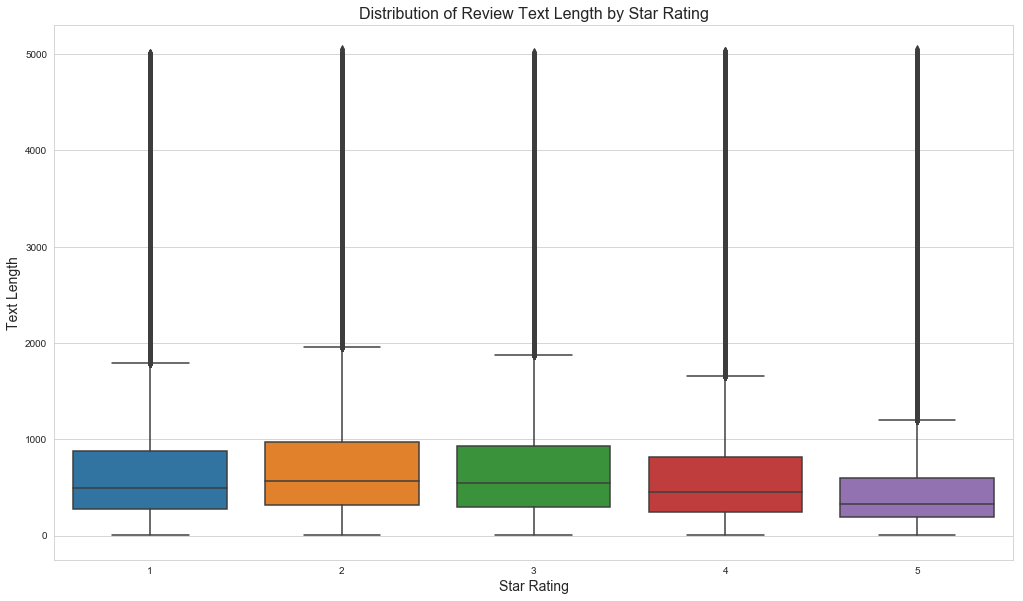

In [16]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.boxplot(x='rev_stars', y='text length', data=df)
plt.title('Distribution of Review Text Length by Star Rating', fontsize=16)
plt.ylabel('Text Length', fontsize=14)
plt.xlabel('Star Rating', fontsize=14)

## Cities in the Dataset

Text(0.5, 52.0, 'Number of Reviews')

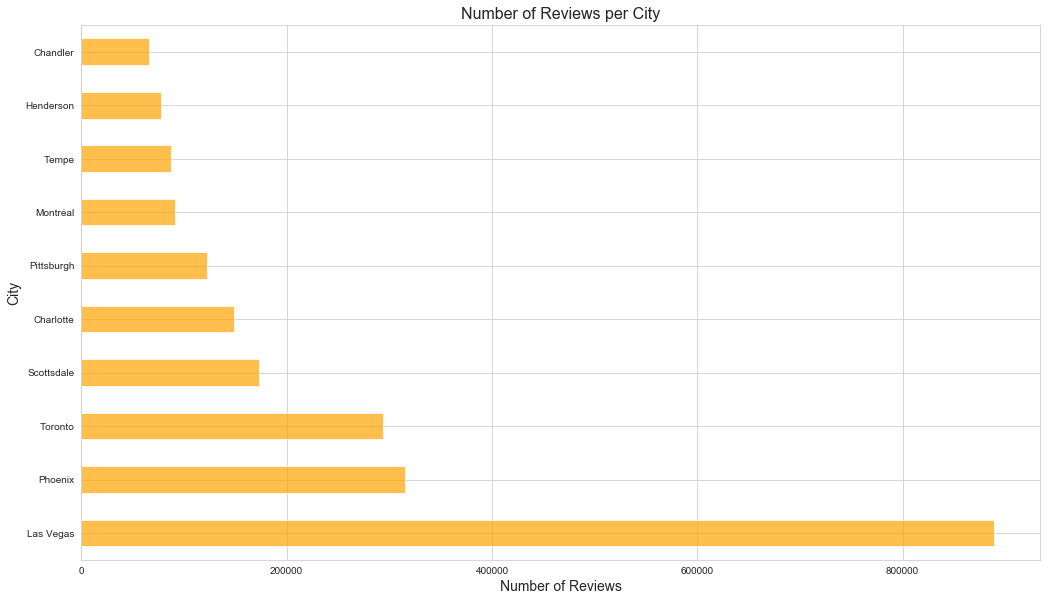

In [17]:
#which city has the most reviews?
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

df.groupby(['city']).size().sort_values(ascending=False)[0:10].plot(kind='barh', color='orange', alpha=0.7)
plt.title('Number of Reviews per City', fontsize=16)
plt.ylabel('City', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)

In [18]:
city_list = list(df.groupby(['city']).size().sort_values(ascending=False).keys()[0:10])

City Name: Las Vegas
Reviews per user: 2.6819534791144566
Reviews per business: 174.61555075593952
Number of Users: 331593
Number of Businesses: 5093
Number of Reviews: 889317


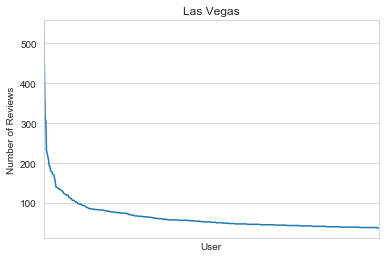

City Name: Phoenix
Reviews per user: 2.6162328812657893
Reviews per business: 101.00320821302535
Number of Users: 120336
Number of Businesses: 3117
Number of Reviews: 314827


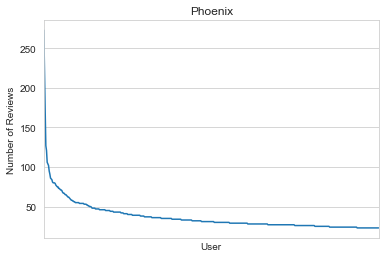

City Name: Toronto
Reviews per user: 4.090067164490426
Reviews per business: 43.74966532797858
Number of Users: 71913
Number of Businesses: 6723
Number of Reviews: 294129


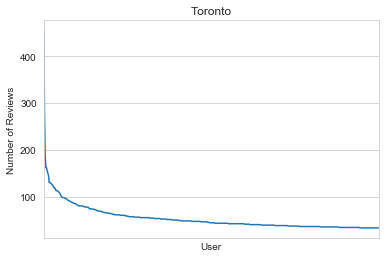

City Name: Scottsdale
Reviews per user: 2.2771967215271474
Reviews per business: 130.93192133131618
Number of Users: 76011
Number of Businesses: 1322
Number of Reviews: 173092


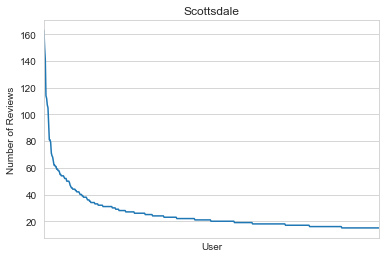

City Name: Charlotte
Reviews per user: 2.9634847154601327
Reviews per business: 70.58840304182509
Number of Users: 50116
Number of Businesses: 2104
Number of Reviews: 148518


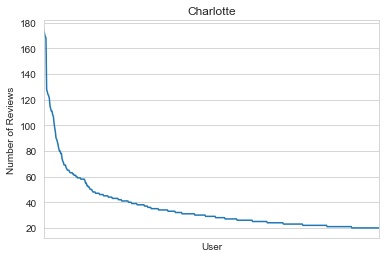

City Name: Pittsburgh
Reviews per user: 2.9504552242400885
Reviews per business: 60.31363860167405
Number of Users: 41518
Number of Businesses: 2031
Number of Reviews: 122497


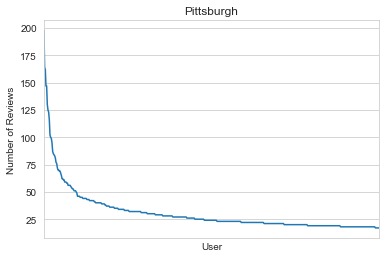

City Name: Montréal
Reviews per user: 2.8016217870257036
Reviews per business: 28.566926677067084
Number of Users: 32680
Number of Businesses: 3205
Number of Reviews: 91557


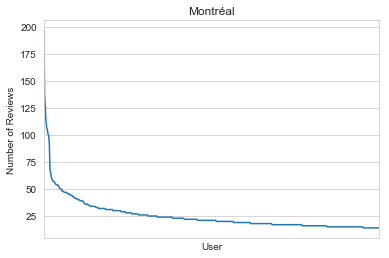

City Name: Tempe
Reviews per user: 1.9679399267069853
Reviews per business: 104.95443645083932
Number of Users: 44479
Number of Businesses: 834
Number of Reviews: 87532


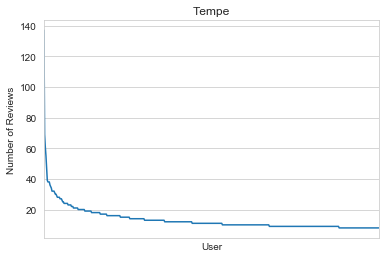

City Name: Henderson
Reviews per user: 2.0068619073513037
Reviews per business: 112.64970930232558
Number of Users: 38619
Number of Businesses: 688
Number of Reviews: 77503


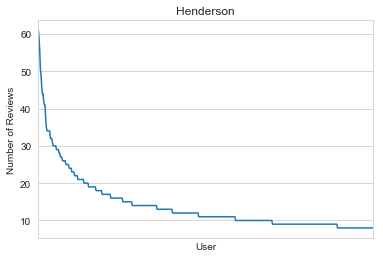

City Name: Chandler
Reviews per user: 2.0756241517533063
Reviews per business: 91.8463687150838
Number of Users: 31683
Number of Businesses: 716
Number of Reviews: 65762


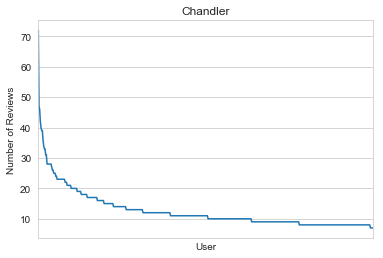

In [19]:
for i in range(0,len(city_list)):
    dfcity = df[df.city == city_list[i]]
    dfcity.groupby(['user_id','rev_stars']).size().sort_values(ascending=False)[0:500].plot()
    print(f'City Name: {city_list[i]}')
    print(f'Reviews per user: {dfcity.rev_stars.count() / len(dfcity.user_id.unique())}')
    print(f'Reviews per business: {dfcity.rev_stars.count() / len(dfcity.business_id.unique())}')
    print(f'Number of Users: {len(dfcity.user_id.unique())}')
    print(f'Number of Businesses: {len(dfcity.business_id.unique())}')
    print(f'Number of Reviews: {dfcity.rev_stars.count()}')
    plt.title(city_list[i])
    plt.xlabel('User')
    plt.ylabel('Number of Reviews')
    plt.xticks([])
    plt.show()
    

## Looking at Restaurant Categories

In [20]:
categories = pd.DataFrame(df.groupby(['business_id','categories','bus_stars']).size())

In [21]:
categories = categories.reset_index()

In [22]:
categories.head(3)

,business_id,categories,bus_stars,0
0,--6MefnULPED_I942VcFNA,Chinese;Restaurants,3.0,37
1,--9e1ONYQuAa-CB_Rrw7Tw,Cajun/Creole;Steakhouses;Restaurants,4.0,1451
2,--DaPTJW3-tB1vP-PfdTEg,Restaurants;Breakfast & Brunch,3.5,39


In [23]:
cat_split = categories['categories'].str.split(';', expand=True)

In [24]:
#remove irrelevant categories: Restaurant, Nightlife, Food
cat_split = cat_split.replace(to_replace=['Restaurants','Nightlife','Food'], value=np.nan)

Text(0.5, 52.0, 'Number of Occurances')

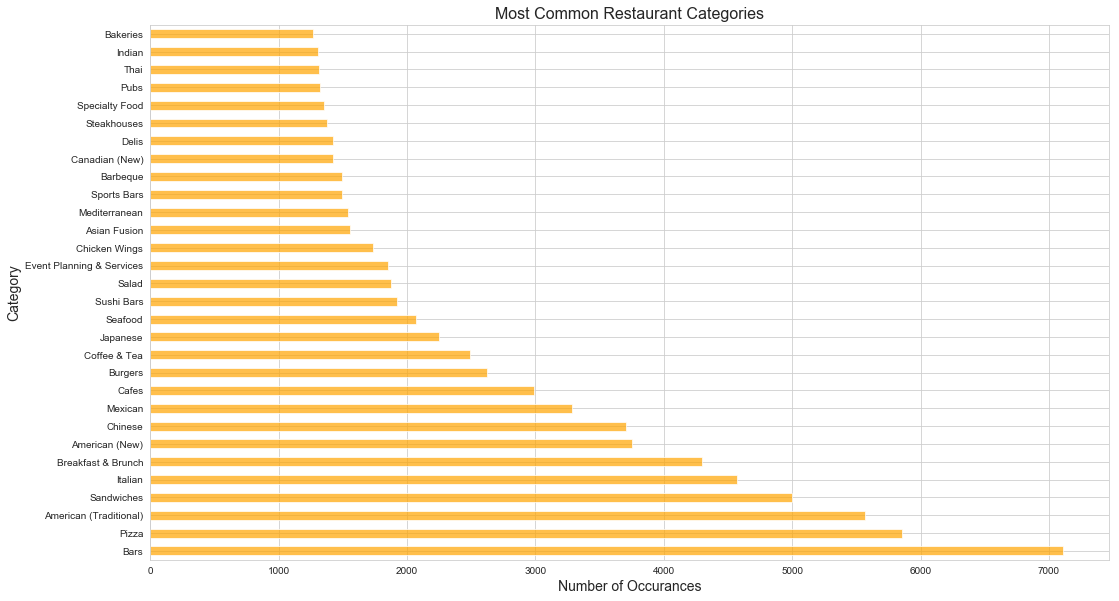

In [25]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

cat_split.stack().value_counts(ascending=False)[0:30].plot(kind='barh', color='orange', alpha=0.7)
plt.title('Most Common Restaurant Categories', fontsize=16)
plt.ylabel('Category', fontsize=14)
plt.xlabel('Number of Occurances', fontsize=14)

In [26]:
#Let's see what the average rating is for a few categories: Pizza, Japanese, Mediterranean, Chinese, Mexican
indian = df[df['categories'].str.contains('Indian')]
japanese = df[df['categories'].str.contains('Japanese')]
med = df[df['categories'].str.contains('Mediterranean')]
chinese = df[df['categories'].str.contains('Chinese')]
mexican = df[df['categories'].str.contains('Mexican')]

## Individual Restaurant Analysis

In [27]:
df.groupby(['business_id','name','city','rev_stars']).size().sort_values(ascending=False).head(10)

business_id             name                        city       rev_stars
4JNXUYY8wbaaDmk3BPzlWw  "Mon Ami Gabi"              Las Vegas  5            3280
RESDUcs7fIiihp38-d6_6g  "Bacchanal Buffet"          Las Vegas  5            2725
4JNXUYY8wbaaDmk3BPzlWw  "Mon Ami Gabi"              Las Vegas  4            2576
DkYS3arLOhA8si5uUEmHOw  "Earl of Sandwich"          Las Vegas  5            2443
hihud--QRriCYZw1zZvW4g  "Gangnam Asian BBQ Dining"  Las Vegas  5            2280
cYwJA2A6I12KNkm2rtXd5g  "Gordon Ramsay BurGR"       Las Vegas  5            2198
KskYqH1Bi7Z_61pH6Om8pg  "Lotus of Siam"             Las Vegas  5            2162
K7lWdNUhCbcnEvI0NhGewg  "Wicked Spoon"              Las Vegas  4            1913
RESDUcs7fIiihp38-d6_6g  "Bacchanal Buffet"          Las Vegas  4            1899
f4x1YBxkLrZg652xt2KR5g  "Hash House A Go Go"        Las Vegas  5            1888
dtype: int64

In [28]:
df.groupby(['user_id'])['useful'].sum().sort_values(ascending=False)[0:10]

user_id
bLbSNkLggFnqwNNzzq-Ijw    15557
zFYs8gSUYDvXkb6O7YkRkw    11515
8DEyKVyplnOcSKx39vatbg    11098
Fv0e9RIV9jw5TX3ctA1WbA     9934
DK57YibC5ShBmqQl97CKog     7424
PKEzKWv_FktMm2mGPjwd0Q     7322
CxDOIDnH8gp9KXzpBHJYXw     6872
M9rRM6Eo5YbKLKMG5QiIPA     6837
rCWrxuRC8_pfagpchtHp6A     6375
qewG3X2O4X6JKskxyyqFwQ     6277
Name: useful, dtype: int64

In [29]:
gordon = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g") & (df.rev_stars == 5)]

In [30]:
gordon_all = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g")]

In [31]:
gordon_all = gordon_all[['date','user_id','rev_stars','useful','funny','cool','text length']]

In [32]:
gordon_all.head()

,date,user_id,rev_stars,useful,funny,cool,text length
172674,2013-08-18,0YBJMg4H0SGqYZbZTxnSOg,4,0,0,0,958
172822,2015-10-23,D9FTLv0yW469_OrVMH4t-Q,5,0,0,1,86
172854,2014-02-17,ltf9Hx604T5OjJ2jJ44BBg,1,1,0,0,383
172897,2016-05-11,FsUSrlL2-W3XsxmOctc9YA,3,1,1,2,471
172961,2017-01-02,Ws70fVeBQnHOFJ-xzJoMnQ,1,0,2,0,411


In [33]:
gordon_all = gordon_all.sort_index()

([], <a list of 0 Text xticklabel objects>)

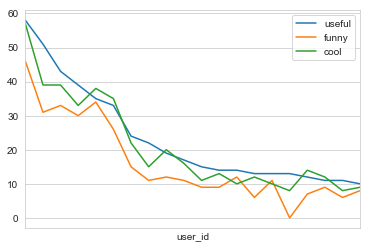

In [98]:

gordon.groupby('user_id')['useful','funny','cool'].sum().sort_values(by='useful', ascending=False)[0:20].plot()
plt.xticks([])

In [41]:
#let's sort by useful reviews with a lot of words
gordon.sort_values(by=['useful','text length'], ascending=False)

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
834408,m9lvZzJBlfFMQz97CyWfuw,cYwJA2A6I12KNkm2rtXd5g,5,2016-03-02,I have to choose the right place for hamburger...,58,46,57,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,2,407,2016
2996564,Gppf1W0Bk9olxs1vplhmUg,cYwJA2A6I12KNkm2rtXd5g,5,2014-11-02,Being an avid burger lover who is always in se...,51,31,39,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,6,2099,2014
228137,393M4uM_4GBLPbhQIQtF9g,cYwJA2A6I12KNkm2rtXd5g,5,2016-02-29,Gordon Ramsay didn't let me down. I had this ...,43,33,39,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,0,1518,2016
1772075,Wd4FRRD30avk-Mj6C_O2ow,cYwJA2A6I12KNkm2rtXd5g,5,2014-01-14,2014 YELP 100 CHALLENGE - 39\/100\n\nMy boyfri...,39,30,33,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,3491,2014
1127244,WGBpuJBQ1FqRTxM8J5BBHg,cYwJA2A6I12KNkm2rtXd5g,5,2015-04-21,LOVED IT!!!\n\nMisc Items: No reservations ar...,35,34,38,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,2810,2015
1455227,cnN6RMKuQiUte7ekcYnK5g,cYwJA2A6I12KNkm2rtXd5g,5,2016-06-21,"When I find myself in times of trouble, Gordon...",33,26,35,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,2802,2016
259869,Nci8Nx0_9G0MSLYvQifacQ,cYwJA2A6I12KNkm2rtXd5g,5,2015-06-28,If I could meet the great Gordon Ramsay in per...,24,15,22,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,6,2689,2015
552735,CY9iLsE2z_yLhLqJdD1WGw,cYwJA2A6I12KNkm2rtXd5g,5,2013-04-12,GO BURGER OFF!!!\n\nThat seems like something ...,22,11,15,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,4,4701,2013
1731549,ZIOCmdFaMIF56FR-nWr_2A,cYwJA2A6I12KNkm2rtXd5g,5,2014-02-07,"It's loud, sporty, with a whole lot of real fl...",19,12,20,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,4,1932,2014
2990398,wwmJ56OlvMC_Z8llXTd6mA,cYwJA2A6I12KNkm2rtXd5g,5,2014-09-16,British Chefs - 1. American Chefs - 0.\n\nWay ...,17,11,16,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,2817,2014


In [42]:
#taking a look at a useful review with a lot of words
gordon.loc[2996564]

user_id                                    Gppf1W0Bk9olxs1vplhmUg
business_id                                cYwJA2A6I12KNkm2rtXd5g
rev_stars                                                       5
date                                          2014-11-02 00:00:00
text            Being an avid burger lover who is always in se...
useful                                                         51
funny                                                          31
cool                                                           39
name                                        "Gordon Ramsay BurGR"
neighborhood                                            The Strip
address                                   "3667 Las Vegas Blvd S"
city                                                    Las Vegas
state                                                          NV
postal_code                                                 89109
latitude                                                  36.1107
longitude 

### Looking at Checkins

In [43]:
df_check = pd.read_csv(f'{path}/external/yelp_checkin.csv')

In [44]:
df_check.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [45]:
gordon_checkin = df_check[(df_check.business_id == "cYwJA2A6I12KNkm2rtXd5g")]

In [46]:
gordon_checkin['weekday'] = pd.Categorical(gordon_checkin['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
gordon_checkin.head()

,business_id,weekday,hour,checkins
25162,cYwJA2A6I12KNkm2rtXd5g,Thu,3:00,131
63515,cYwJA2A6I12KNkm2rtXd5g,Mon,16:00,7
66894,cYwJA2A6I12KNkm2rtXd5g,Sat,18:00,173
115057,cYwJA2A6I12KNkm2rtXd5g,Wed,13:00,1
117984,cYwJA2A6I12KNkm2rtXd5g,Tue,4:00,116


In [48]:
checkin_by_day = gordon_checkin.groupby(['weekday','hour']).sum()

In [49]:
matplotlib.rcParams['figure.figsize'] = (8, 5)
gordon_checkin.groupby(['hour'])['checkins'].sum().plot()

NameError: name 'matplotlib' is not defined

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.boxplot(x='weekday', y='checkins', data=gordon_checkin, color='lightgray')
sns.stripplot(x='weekday', y='checkins', data=gordon_checkin, alpha=0.8, jitter=True, size=10, linewidth=1)
plt.title('Distribution of Checkins per Day at Gordon Ramsay BurGR', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Checkins', fontsize=12)

In [ ]:
vegas = list(df[(df.city == "Las Vegas") & (df.neighborhood == 'The Strip') & (df.rev_stars == 5)].business_id)

In [ ]:
vegas_checkins = df_check[df_check.business_id.isin(vegas)]

In [ ]:
vegas_checkins['weekday'] = pd.Categorical(vegas_checkins['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [ ]:
#how do all other restaurants on The Strip in Las Vegas compare?
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.boxplot(x='weekday', y='checkins', data=vegas_checkins, color='lightgray')
sns.stripplot(x='weekday', y='checkins', data=vegas_checkins, alpha=0.05, jitter=.15, size=5)
plt.title('Distribution of Checkins per Day at 5-Star Vegas Restaurants on The Strip', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Checkins', fontsize=12)
plt.ylim(-10, 60)

### Timeseries

In [50]:
gordon_all['year'] = gordon_all.date.apply(lambda x: x.year)

In [51]:
gordon_all.head()

,date,user_id,rev_stars,useful,funny,cool,text length,year
172674,2013-08-18,0YBJMg4H0SGqYZbZTxnSOg,4,0,0,0,958,2013
172822,2015-10-23,D9FTLv0yW469_OrVMH4t-Q,5,0,0,1,86,2015
172854,2014-02-17,ltf9Hx604T5OjJ2jJ44BBg,1,1,0,0,383,2014
172897,2016-05-11,FsUSrlL2-W3XsxmOctc9YA,3,1,1,2,471,2016
172961,2017-01-02,Ws70fVeBQnHOFJ-xzJoMnQ,1,0,2,0,411,2017


In [52]:
gordon_all['week'] = gordon_all.date.apply(lambda x: x.week)

In [53]:
gordon_all.head()

,date,user_id,rev_stars,useful,funny,cool,text length,year,week
172674,2013-08-18,0YBJMg4H0SGqYZbZTxnSOg,4,0,0,0,958,2013,33
172822,2015-10-23,D9FTLv0yW469_OrVMH4t-Q,5,0,0,1,86,2015,43
172854,2014-02-17,ltf9Hx604T5OjJ2jJ44BBg,1,1,0,0,383,2014,8
172897,2016-05-11,FsUSrlL2-W3XsxmOctc9YA,3,1,1,2,471,2016,19
172961,2017-01-02,Ws70fVeBQnHOFJ-xzJoMnQ,1,0,2,0,411,2017,1


In [54]:
reviews = pd.DataFrame(gordon_all.groupby(['year', 'week', 'rev_stars']).size()).reset_index()

In [55]:
reviews.head(10)

,year,week,rev_stars,0
0,2012,1,1,4
1,2012,51,5,1
2,2012,52,1,1
3,2012,52,2,1
4,2012,52,4,4
5,2012,52,5,5
6,2013,1,1,1
7,2013,1,3,2
8,2013,1,4,7
9,2013,1,5,8


In [56]:
reviews_good = reviews[(reviews.rev_stars >= 4) & (reviews.year == 2015)]

In [57]:
reviews_good.head()

,year,week,rev_stars,0
469,2015,1,4,6
470,2015,1,5,8
474,2015,2,4,10
475,2015,2,5,10
479,2015,3,4,6


Text(0.5, 52.0, 'Week of Year')

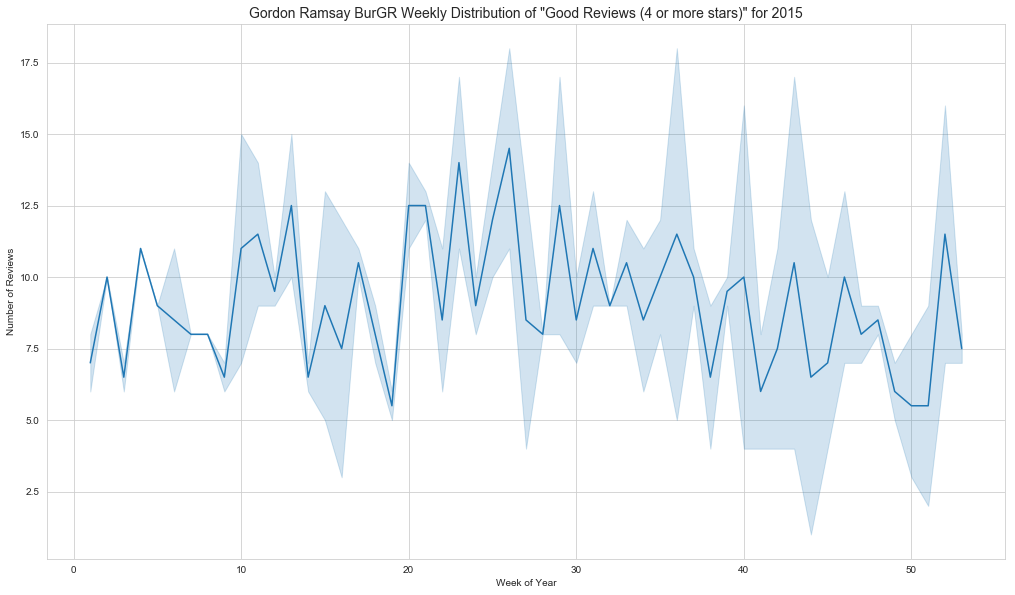

In [99]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.lineplot(x='week', y=0, data=reviews_good)

plt.title('Gordon Ramsay BurGR Weekly Distribution of "Good Reviews (4 or more stars)" for 2015', fontsize=14)
plt.ylabel('Number of Reviews')
plt.xlabel('Week of Year')

In [59]:
gordon_all['weekday'] = gordon_all.date.apply(lambda x: x.weekday())

(1, 5)

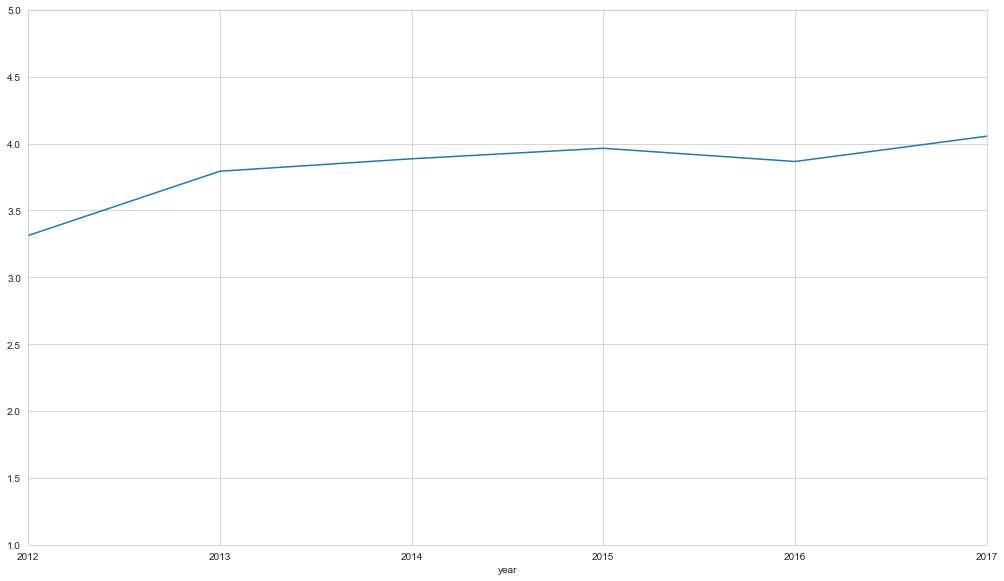

In [60]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

gordon_all.groupby(['year'])['rev_stars'].mean().plot()
plt.ylim(1,5)

Text(0.5, 1.0, 'Distribution Star Ratings Over the Years for Gordon Ramsay BurGR')

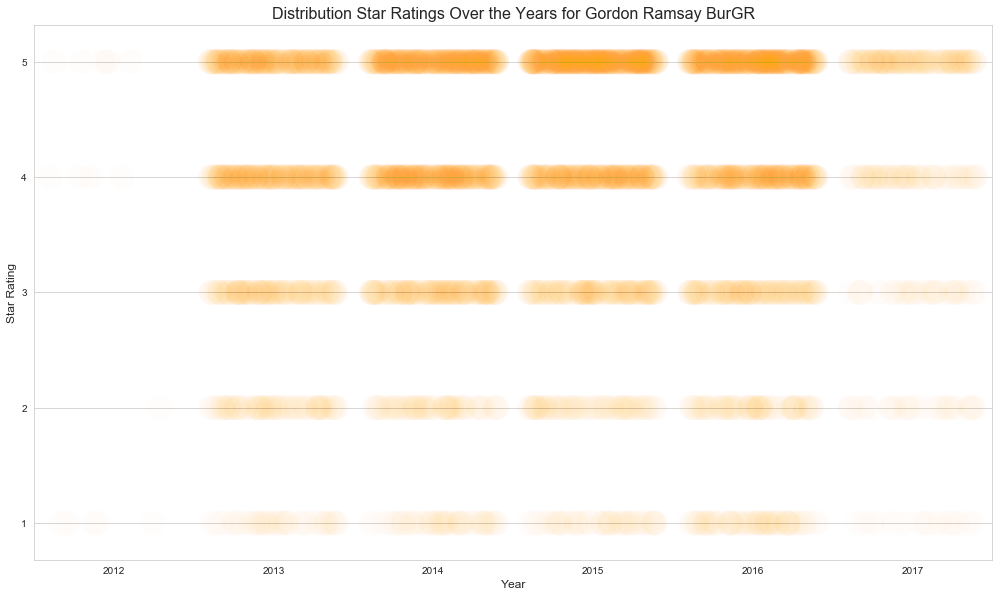

In [61]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.stripplot(x='year', y='rev_stars', data=gordon_all, alpha=0.01, 
              jitter=0.4, size=25, color='orange')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)

plt.title('Distribution Star Ratings Over the Years for Gordon Ramsay BurGR', fontsize=16)

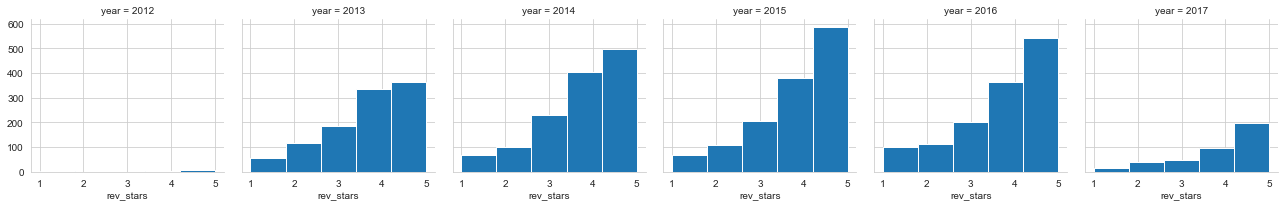

In [62]:
g = sns.FacetGrid(data=gordon_all, col='year')
g.map(plt.hist, 'rev_stars', bins=5)

## Users and their friends

In [63]:
df_friends = pd.read_csv(f'{path}/external/yelp_user.csv', parse_dates=['yelping_since'])

In [64]:
df_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


In [65]:
df_friends.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
user_id               1326100 non-null object
name                  1325603 non-null object
review_count          1326100 non-null int64
yelping_since         1326100 non-null datetime64[ns]
friends               1326100 non-null object
useful                1326100 non-null int64
funny                 1326100 non-null int64
cool                  1326100 non-null int64
fans                  1326100 non-null int64
elite                 1326100 non-null object
average_stars         1326100 non-null float64
compliment_hot        1326100 non-null int64
compliment_more       1326100 non-null int64
compliment_profile    1326100 non-null int64
compliment_cute       1326100 non-null int64
compliment_list       1326100 non-null int64
compliment_note       1326100 non-null int64
compliment_plain      1326100 non-null int64
compliment_cool       1326100 non-null int64
compliment_funny 

In [66]:
df_friends['friends'] = df_friends.friends.apply(lambda x: np.nan if x == 'None' else x)

In [67]:
df_with_friends = df_friends.dropna()

In [68]:
df_with_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
17,h5ERTYn2vQ1QbjTZvfWPaA,Bobby,3,2017-01-07,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...",0,0,0,0,None,3.33,0,0,0,0,0,0,0,0,0,0,0
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,3.73,2,0,0,0,0,1,1,1,1,2,0
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,3.96,2,4,0,0,0,9,7,7,7,4,0
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1


In [69]:
df_with_friends['num_friends'] = df_with_friends.friends.apply(lambda x: x.count(',') + 1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_with_friends['year'] = df_with_friends.yelping_since.apply(lambda x: x.year)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### A Dataframe containing only users with friends

In [71]:
df_with_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_friends,year
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0,79,2013
17,h5ERTYn2vQ1QbjTZvfWPaA,Bobby,3,2017-01-07,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...",0,0,0,0,None,3.33,0,0,0,0,0,0,0,0,0,0,0,64,2017
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,3.73,2,0,0,0,0,1,1,1,1,2,0,263,2010
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,3.96,2,4,0,0,0,9,7,7,7,4,0,100,2007
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1,332,2008


In [72]:
#remove users with less than 10 friends
df_with_friends.drop(df_with_friends[df_with_friends.review_count < 10].index, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0.5, 1.0, 'Average Star Rating for Users with More than 10 Friends')

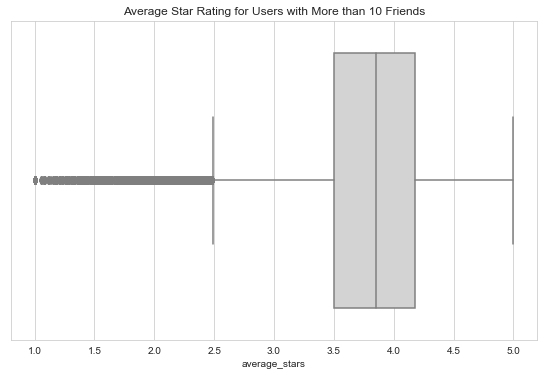

In [73]:
fig, ax = plt.subplots(figsize = (8,5))
plt.tight_layout()

sns.boxplot(x='average_stars', data=df_with_friends, color='lightgray')
plt.title('Average Star Rating for Users with More than 10 Friends')

Text(0.5, 1.0, 'Average Star Rating for All Users')

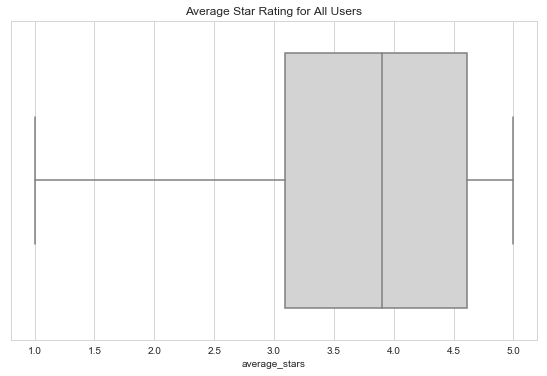

In [74]:
fig, ax = plt.subplots(figsize = (8,5))
plt.tight_layout()

sns.boxplot(x='average_stars', data=df_friends, color='lightgray')
plt.title('Average Star Rating for All Users')

Text(0.5, 52.0, 'Number of Friends')

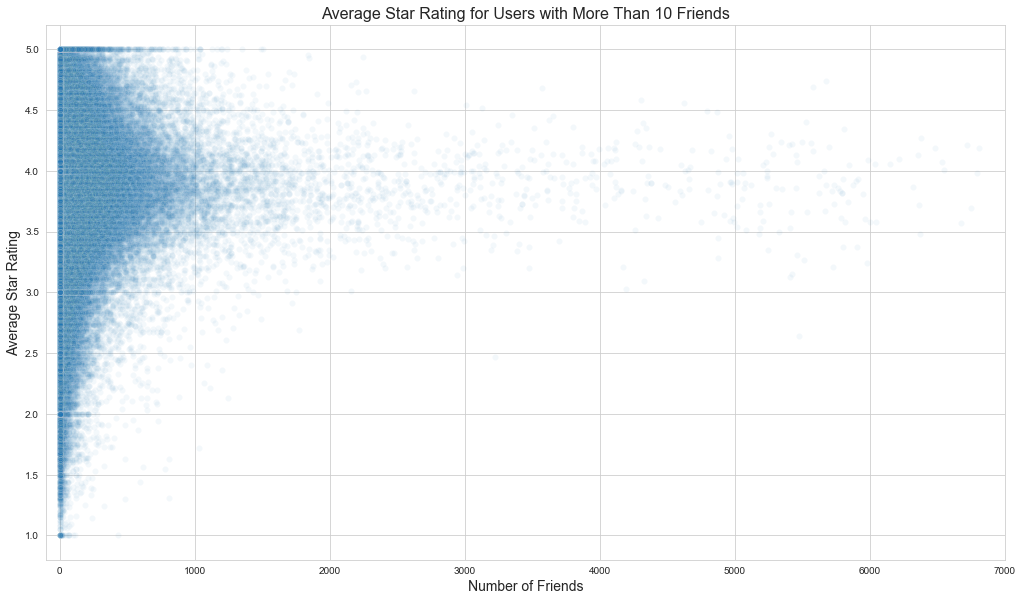

In [75]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.scatterplot(#x=np.log(df_friends.num_friends),
                x='num_friends', 
                y='average_stars', data=df_with_friends, alpha=0.05)
plt.xlim(-100,7000)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Friends', fontsize=14)

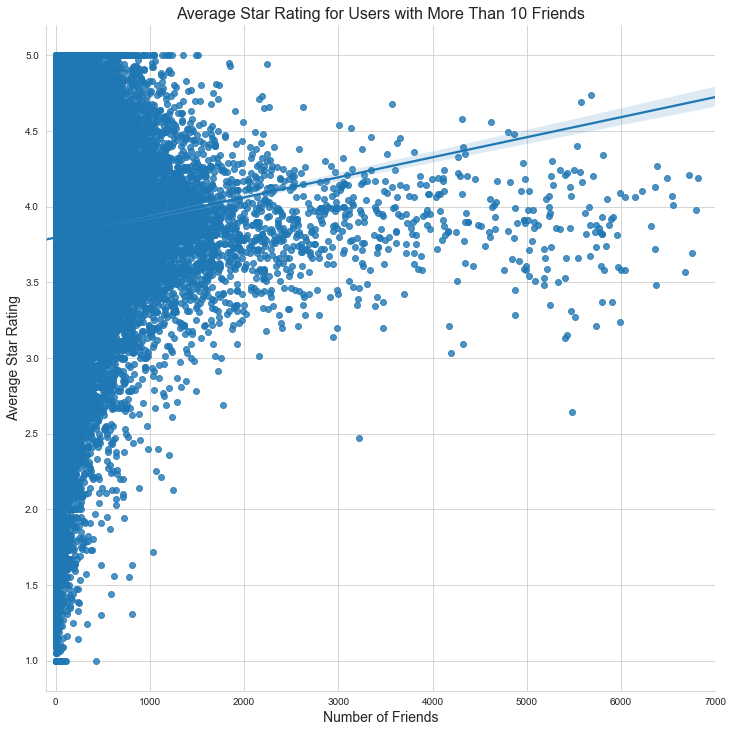

In [85]:
sns.lmplot(x='num_friends', y='average_stars', fit_reg=True, data=df_with_friends,
          height=10, aspect=1.0)
plt.xlim(-100,7000)
plt.ylim(0.8,5.2)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Friends', fontsize=14)
plt.show()

Text(0.5, 0, 'Number of Reviews')

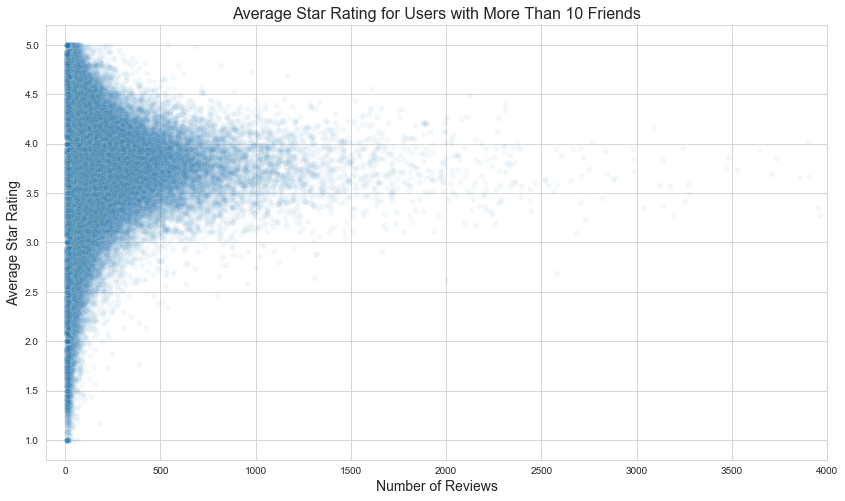

In [187]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.scatterplot(x='review_count', y='average_stars', data=df_with_friends, alpha=0.05)
plt.xlim(-100, 4000)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)

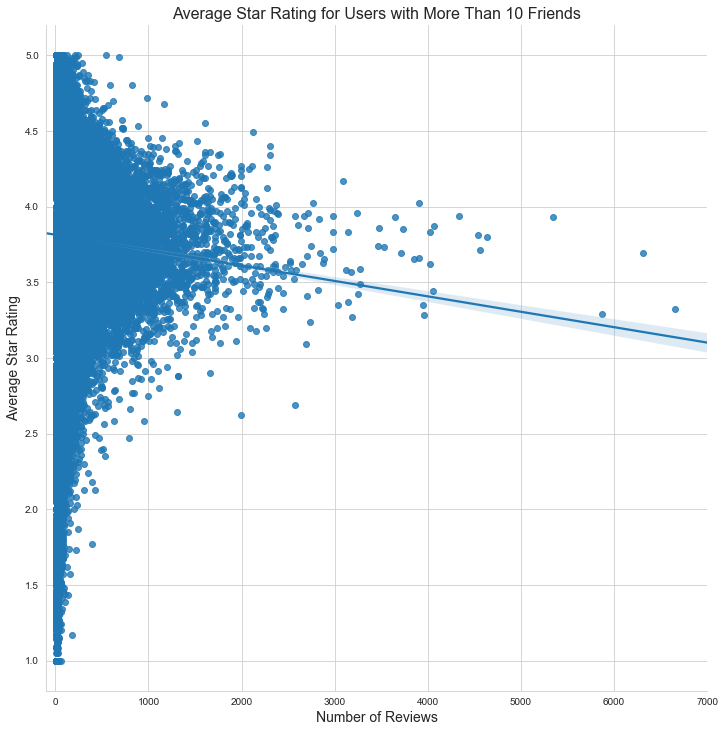

In [96]:
sns.lmplot(x='review_count', y='average_stars', fit_reg=True, data=df_with_friends,
          height=10, aspect=1.0)
plt.xlim(-100,7000)
plt.ylim(0.8,5.2)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)
plt.show()

Text(0.5, 0, 'Number of Friends (Log)')

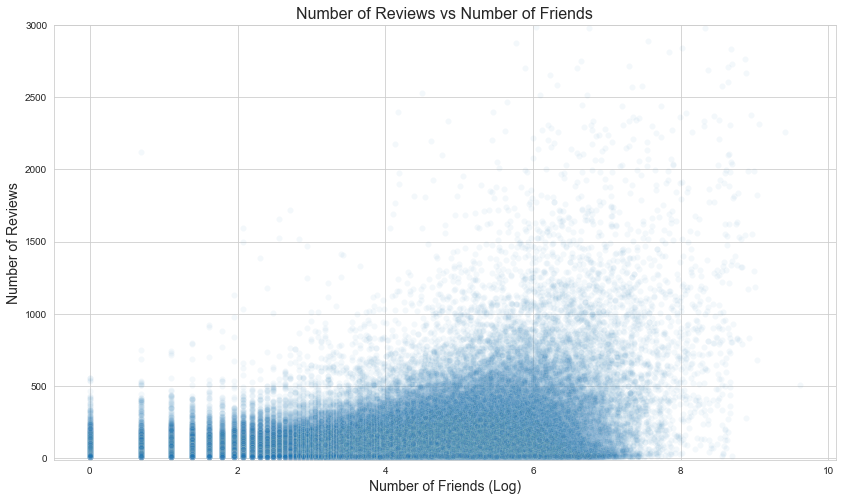

In [188]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.scatterplot(x=np.log(df_with_friends.num_friends), y='review_count', data=df_with_friends, alpha=0.05)
plt.ylim(-10,3000)
plt.title('Number of Reviews vs Number of Friends', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xlabel('Number of Friends (Log)', fontsize=14)

# NLP - Restaurant Reviews

In [200]:
#Importing all necessary libraries
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter #count the words
from gensim.corpora.dictionary import Dictionary
from collections import defaultdict
import itertools

from gensim.utils import simple_preprocess
from gensim.models.tfidfmodel import TfidfModel

from operator import itemgetter

from gensim import models

from gensim.models import LdaModel, LdaMulticore

wordnet_lemmatizer = WordNetLemmatizer()
english_stops = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", 
                 "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
                 "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
                 "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", 
                 "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", 
                 "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", 
                 "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", 
                 "against", "between", "into", "through", "during", "before", "after", "above", 
                 "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", 
                 "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", 
                 "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", 
                 "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", 
                 "just", "don", "should", "now"]

### NLP - Using NLTK

#### Tokenize words

In [33]:
#picking a single review to focus on
review = gordon.loc[2996564].text

In [38]:
sentences = sent_tokenize(review)

In [41]:
#Let's see the first 5 sentences
sentences[0:4]

["Being an avid burger lover who is always in search of the ultimate burger, Gordon Ramsey's BurGR has been on my bookmark for the longest time.",
 'We were excited that we were eventually there!',
 'This place must be popular.',
 'At around 2:30PM on a Sunday afternoon during the slower season of October, we were still quoted a 20 - 30 minute wait.']

In [42]:
words = word_tokenize(review)

In [126]:
words[0:5]

['Being', 'an', 'avid', 'burger', 'lover']

#### Lowercase

In [45]:
#let's convert to lowercase
lower_tokens = [t.lower() for t in words]

In [47]:
#simple bag of words
bow_simple = Counter(lower_tokens)

In [142]:
#let's see the top ten most common words from this review
print(bow_simple.most_common(10))

[('.', 23), ('the', 21), ('were', 12), ('and', 11), (',', 9), ('it', 9), ('burger', 8), ('a', 8), ("'s", 7), ('with', 7)]


#### Removing stop words and using alphabetical characters only

In [52]:
#OK it's obvious that in a long paragraph the most common tokens are 'the', 'were', punctuation and 'burger', 
#which probably has something to do with the fact that this place serves burgers
#let's start with the basics and only retain alphabetical words
alpha_only = [t for t in lower_tokens if t.isalpha()]
#and let's remove all the stop words
no_stops = [t for t in alpha_only if t not in english_stops]

In [128]:
# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
# Create the bag-of-words: bow
bow = Counter(lemmatized)
# Let's print the 10 most common tokens again
print(bow.most_common(5))

[('burger', 8), ('really', 5), ('u', 4), ('probably', 4), ('bacon', 4)]


### Gensim library

In [58]:
dictionary = Dictionary([lemmatized])

In [59]:
burger_id = dictionary.token2id.get('burger')

In [60]:
print(dictionary.get(burger_id))

burger


In [87]:
#Creating an MmCorpus
corpus = [dictionary.doc2bow(lem) for lem in [lemmatized]]

In [93]:
doc = corpus[0]

In [94]:
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

In [95]:
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

burger 8
really 5
bacon 4
probably 4
u 4


In [106]:
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [107]:
# Sort the doc for frequency: bow_doc
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

In [108]:
# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

burger 8
really 5
bacon 4
probably 4
u 4


#### Gensim TF-IDF

In [194]:
def custom_preprocess(input_string):
    '''
    This function will take a string as an input (in this case an individual review)
    and return a pre-processed list of tokens based on below processing methods
    '''
    doc_words = word_tokenize(input_string) #tokenize words
    lower_tokens = [t.lower() for t in doc_words] #let's convert to lowercase 
    alpha_only = [t for t in lower_tokens if t.isalpha()] #keep only alphabetical characters
    no_stops = [t for t in alpha_only if t not in english_stops] #and let's remove all the stop words
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops] # Lemmatize all tokens into a new list: lemmatized
    
    return lemmatized

In [209]:
#picking only three reviews for this example
documents = list([gordon.loc[2996564].text, 
                  gordon.loc[552735].text, 
                  gordon.loc[1127244].text])

# Create the Dictionary and Corpus
mydict = Dictionary([custom_preprocess(review) for review in documents])
corpus = [mydict.doc2bow(custom_preprocess(review)) for review in documents]

# Create the TF-IDF model
tfidf = TfidfModel(corpus, smartirs='ntc')

# Show the TF-IDF weights
tfidf_weights = []
for doc in tfidf[corpus]:

    weight=[[mydict[id], np.around(freq, decimals=2)] for id, freq in doc]
    
    tfidf_weights.append(weight)

In [268]:
print('Top 10 freq words in first review: ')
sorted(tfidf_weights[0], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in first review: 


[['probably', 0.32],
 ['ultimate', 0.24],
 ['absolutely', 0.16],
 ['although', 0.16],
 ['breast', 0.16],
 ['close', 0.16],
 ['egg', 0.16],
 ['fry', 0.16],
 ['love', 0.16],
 ['perfectly', 0.16]]

In [269]:
print('Top 10 freq words in second review: ')
sorted(tfidf_weights[1], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in second review: 


[['waitress', 0.31],
 ['glad', 0.18],
 ['roasted', 0.18],
 ['sou', 0.18],
 ['ticket', 0.18],
 ['told', 0.18],
 ['vega', 0.18],
 ['chef', 0.15],
 ['eat', 0.13],
 ['looked', 0.13]]

In [270]:
print('Top 10 freq words in third review: ')
sorted(tfidf_weights[2], key=itemgetter(1), reverse=True)[0:10]

Top 10 freq words in third review: 


[['http', 0.34],
 ['could', 0.2],
 ['ramsay', 0.2],
 ['top', 0.2],
 ['bite', 0.14],
 ['booth', 0.14],
 ['brûlée', 0.14],
 ['chair', 0.14],
 ['creme', 0.14],
 ['fan', 0.14]]

#### Gensim Bigrams and Trigrams

In [243]:
words = [word_tokenize(review) for review in documents]

In [244]:
#build the bigrams model
bigrams = models.phrases.Phrases(words, min_count=3, threshold=10)

#### LDA Topics

In [364]:
lda_model = LdaMulticore(corpus=corpus,
                        id2word=mydict,
                        random_state=42,
                        num_topics=5,
                        passes=10,
                        chunksize=10,
                        batch=False,
                        alpha='asymmetric',
                        decay=0.5,
                        offset=64,
                        eta=None,
                        eval_every=0,
                        iterations=100,
                        gamma_threshold=0.001,
                        per_word_topics=True)

In [365]:
lda_model.print_topic(-1)

'0.022*"burger" + 0.012*"would" + 0.010*"chef" + 0.009*"like" + 0.008*"waitress" + 0.008*"really" + 0.007*"also" + 0.007*"gordon" + 0.006*"one" + 0.006*"good"'

##### This was a relatively small sample of reviews. Let's try this on the entire set of 5 star reviews for this restaurant

In [196]:
#Let's first look at the same restaurant but include all 5 star reviews
all_documents = list(gordon.text)

In [201]:
# Create the Dictionary and Corpus
all_mydict = Dictionary([custom_preprocess(review) for review in all_documents])
all_corpus = [all_mydict.doc2bow(custom_preprocess(review)) for review in all_documents]

In [202]:
all_lda_model = LdaMulticore(corpus=all_corpus,
                            id2word=all_mydict,
                            random_state=42,
                            num_topics=10,
                            passes=100,
                            chunksize=10,
                            batch=False,
                            alpha='asymmetric',
                            decay=0.5,
                            offset=64,
                            eta=None,
                            eval_every=0,
                            iterations=100,
                            gamma_threshold=0.001,
                            per_word_topics=True)

In [205]:
for c in all_lda_model[all_corpus[0:5]]:
    print("Document Topics      : ", c[0])      # [(Topics, Perc Contrib)]
    print("Word id, Topics      : ", c[1][:3])  # [(Word id, [Topics])]
    print("Phi Values (word id) : ", c[2][:2])  # [(Word id, [(Topic, Phi Value)])]
    print("Word, Topics         : ", [(all_mydict[wd], topic) for wd, topic in c[1][:2]])   # [(Word, [Topics])]
    print("Phi Values (word)    : ", [(all_mydict[wd], topic) for wd, topic in c[2][:2]])  # [(Word, [(Topic, Phi Value)])]
    print("------------------------------------------------------\n")

Document Topics      :  [(0, 0.22032925), (1, 0.7154728), (2, 0.012467383), (3, 0.010444204)]
Word id, Topics      :  [(0, [1]), (1, [1]), (2, [1])]
Phi Values (word id) :  [(0, [(1, 0.9999817)]), (1, [(1, 0.9999964)])]
Word, Topics         :  [('best', [1]), ('burger', [1])]
Phi Values (word)    :  [('best', [(1, 0.9999817)]), ('burger', [(1, 0.9999964)])]
------------------------------------------------------

Document Topics      :  [(1, 0.8832582), (9, 0.10349064)]
Word id, Topics      :  [(1, [1]), (4, [1]), (6, [1])]
Phi Values (word id) :  [(1, [(1, 0.9999972)]), (4, [(1, 0.9999926)])]
Word, Topics         :  [('burger', [1]), ('fry', [1])]
Phi Values (word)    :  [('burger', [(1, 0.9999972)]), ('fry', [(1, 0.9999926)])]
------------------------------------------------------

Document Topics      :  [(0, 0.092104904), (1, 0.896724)]
Word id, Topics      :  [(1, [1]), (13, [1]), (16, [1])]
Phi Values (word id) :  [(1, [(1, 4.999986)]), (13, [(1, 1.9996295)])]
Word, Topics        

In [206]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
pyLDAvis.enable_notebook()

In [208]:
vis = pyLDAvis.gensim.prepare(all_lda_model, all_corpus, all_mydict)
vis

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.410963  0.071689       1        1  91.633133
0     -0.034966 -0.357576       2        1   4.166873
9      0.076302  0.069186       3        1   1.745369
2      0.060516  0.035390       4        1   0.505565
4      0.065487  0.038086       5        1   0.489110
3      0.054988  0.033074       6        1   0.481346
7      0.052359  0.030661       7        1   0.274895
5      0.047269  0.027334       8        1   0.270157
6      0.046671  0.027563       9        1   0.223859
8      0.042338  0.024593      10        1   0.209686, topic_info=     Category         Freq          Term        Total  loglift  logprob
290   Default   634.000000         shake   634.000000   30.000  30.0000
150   Default   402.000000         table   402.000000   29.000  29.0000
171   Default   157.000000            la   157.000000   28.000  28.0000
22    Default  1152.000000          food  1152.000000   27.000  27.0000
245   Default   255.000000        around   255.000000   26.000  26.0000
472   Default   223.000000          chef   223.000000   25.000  25.0000
281   Default   170.000000          oreo   170.000000   24.000  24.0000
236   Default   274.000000           say   274.000000   23.000  23.0000
287   Default   125.000000         ready   125.000000   22.000  22.0000
190   Default   182.000000           bar   182.000000   21.000  21.0000
35    Default   173.000000          name   173.000000   20.000  20.0000
173   Default   327.000000        server   327.000000   19.000  19.0000
298   Default   102.000000          text   102.000000   18.000  18.0000
104   Default   120.000000       hostess   120.000000   17.000  17.0000
73    Default   120.000000         check   120.000000   16.000  16.0000
669   Default   116.000000         creme   116.000000   15.000  15.0000
268   Default   133.000000          hour   133.000000   14.000  14.0000
331   Default   242.000000         staff   242.000000   13.000  13.0000
1     Default  5442.000000        burger  5442.000000   12.000  12.0000
249   Default    94.000000        casino    94.000000   11.000  11.0000
959   Default   103.000000      customer   103.000000   10.000  10.0000
188   Default   163.000000         visit   163.000000    9.000   9.0000
495   Default   136.000000     milkshake   136.000000    8.000   8.0000
108   Default   148.000000           let   148.000000    7.000   7.0000
663   Default   121.000000         glass   121.000000    6.000   6.0000
...       ...          ...           ...          ...      ...      ...
4829  Topic10     0.181342       überall     0.768727    4.723  -7.2704
4806  Topic10     0.181342        gefühl     0.768727    4.723  -7.2704
4805  Topic10     0.181342      einziger     0.768727    4.723  -7.2704
4818  Topic10     0.181342       perfekt     0.768727    4.723  -7.2704
4817  Topic10     0.181342      nächsten     0.768727    4.723  -7.2704
4819  Topic10     0.181342          popo     0.768727    4.723  -7.2704
4820  Topic10     0.181342       schnell     0.768727    4.723  -7.2704
4821  Topic10     0.181342      schweres     0.768727    4.723  -7.2704
4823  Topic10     0.181342       tomaten     0.768727    4.723  -7.2704
4807  Topic10     0.181342           grs     0.768727    4.723  -7.2704
4815  Topic10     0.181342  negativpunkt     0.768727    4.723  -7.2704
4804  Topic10     0.181342         einen     0.768727    4.723  -7.2704
4816  Topic10     0.181342          noch     0.768727    4.723  -7.2704
4812  Topic10     0.181342        könnte     0.768727    4.723  -7.2704
4808  Topic10     0.181342         haben     0.768727    4.723  -7.2704
4809  Topic10     0.181342          halt     0.768727    4.723  -7.2704
4810  Topic10     0.181342         immer     0.768727    4.723  -7.2704
4811  Topic10     0.181342        kunden     0.768727    4.723  -7.2704
4813  Topic10     0.181342       leckere     0.768727    4.723  -7.27

### Sentiment Analysis using Afinn

In [212]:
#Let's take some positive data first
from afinn import Afinn
#picking only three reviews for this example
documents = list([gordon.loc[2996564].text, 
                  gordon.loc[552735].text, 
                  gordon.loc[1127244].text])

In [213]:
af = Afinn()
sentiment_scores = [af.score(review) for review in documents]
sentiment_category = ['positive' if score > 10 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [214]:
print(sentiment_scores)
print(sentiment_category)

[59.0, 66.0, 60.0]
['positive', 'positive', 'positive']


In [215]:
#now let's take three negative reviews
gordon_negative = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g") & (df.rev_stars == 1)]
documents_negative = list(gordon_negative.text[0:3])

In [216]:
sentiment_scores = [af.score(review) for review in documents_negative]
sentiment_category = ['positive' if score > 10 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [218]:
print(sentiment_scores)
print(sentiment_category)

[12.0, 4.0, -9.0]
['positive', 'neutral', 'negative']


### Sentiment Analysis using TextBlob

In [352]:
from textblob import TextBlob

In [357]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in documents]
sentiment_category_tb = ['positive' if score > 0
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [358]:
sentiment_scores_tb

[0.308, 0.22, 0.282]

In [359]:
sentiment_category_tb

['positive', 'positive', 'positive']

In [361]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in documents_negative]
sentiment_category_tb = ['positive' if score > 0
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [362]:
sentiment_scores_tb

[0.11, 0.022, -0.22]

In [363]:
sentiment_category_tb

['positive', 'positive', 'negative']

In [ ]:
'''import networkx as nx

G = nx.Graph()

#adding the nodes for users and businesses
G.add_nodes_from(pit['user_id'], bipartite='user_id')
G.add_nodes_from(pit['business_id'], bipartite='business_id')
#adding edges between the users and businesses
G.add_edges_from(zip(pit['user_id'], pit['business_id']))

#Gather nodes from all partitions
cust_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'user_id']
rest_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'business_id']

#create the connectivity matrix
mat = nx.bipartite.biadjacency_matrix(G,
                                     row_order=cust_nodes,
                                     column_order=rest_nodes)

''''''from nxviz import CircosPlot

c = CircosPlot(G, node_grouping='bipartite', node_color='bipartite')
c.draw()
plt.show()


plt.savefig('phoenix_network.png')''''''


adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool)

adjacency_matrix.sum()

from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a networkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(10, 10)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")

draw_adjacency_matrix(G)


#multiply the original matrix by the the transposed matrix to develop a business connectivity matrix
con_matrix = mat @ mat.T

#set the diagonal to zero and convert to coordinate matrix format
con_matrix.setdiag(0)
business_coo = con_matrix.tocoo()

#find the businesses who shared the most number of users

count = list(con_matrix.sum(axis=0))
print(count[0][0])
[[  423  6273 11523 ...   103    50     5]]
#use degree centrality to figure out the customer importance metric
#the higher values represent more connections to restaurants
nx.bipartite.degree_centrality(G, cust_nodes)'''

In [ ]:
'''test = pd.DataFrame(columns=['users','restaurants'])

test.loc[5] = ['user3', 'rest3']

test.groupby(['restaurants', 'users']).size().unstack('restaurants')

U = nx.Graph()
U.add_nodes_from(test['users'], bipartite='users')
U.add_nodes_from(test['restaurants'], bipartite='restaurants')
U.add_edges_from(zip(test['users'],test['restaurants']))
#Gather nodes from all partitions
testC_nodes = [n for n in U.nodes() if U.node[n]['bipartite'] == 'users']
testR_nodes = [n for n in U.nodes() if U.node[n]['bipartite'] == 'restaurants']
test_mat = nx.bipartite.biadjacency_matrix(U,
                                     row_order=testC_nodes,

#multiply the original matrix by the the transposed matrix to develop a business connectivity matrix
test_con_matrix =  test_mat.T @ test_mat

test_con_matrix.setdiag(0)
test_business_coo = test_con_matrix.tocoo()

count = list(test_con_matrix.sum(axis=0))
'''